In [1]:
# %%capture
import numpy as np
import astropy.units as u
from astropy.units import Quantity
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.time import Time
import pandas as pd
from sparse import COO

from lmfit.lineshapes import gaussian

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from pathlib import Path

from cosipy.response import FullDetectorResponse, DetectorResponse, ListModeResponse
from cosipy.spacecraftfile import SpacecraftFile
from cosipy import test_data

from histpy import Histogram
from mhealpy import HealpixMap, HealpixBase
from scoords import Attitude, SpacecraftFrame

from threeML import Model, Powerlaw

13:26:06 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=237033;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=394487;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=843802;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=501788;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

/Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=518551;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=341060;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

/Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


13:26:06 INFO      Starting 3ML!                                                                     ]8;id=753853;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=514702;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=948450;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=410587;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=833163;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=698123;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=692337;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=302431;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#40\40]8;;\

13:26:07 WARNING   ROOT minimizer not available                                                ]8;id=890103;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=114963;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1345\1345]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=356653;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=112770;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=636538;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=449404;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

13:26:07 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=302017;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=855335;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=30493;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=5041;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=922242;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=715093;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   No fermitools installed                                              ]8;id=945094;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=359005;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

         WARNING   Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=95360;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=149502;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=329392;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=192020;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal     ]8;id=377458;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=739035;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

### Creating example response file

In [2]:
Ei = np.array([507, 509, 511, 513, 515])

R = np.zeros((5,5))
for i in np.arange(5):
    Z = gaussian(x=Ei[i], center=Ei)
    R[i, :] = np.round(Z / np.sum(Z), 2)

for i in range(1,4):
    R[i,i] -= 0.01

R[::-1, :]

array([[0.  , 0.  , 0.  , 0.12, 0.88],
       [0.  , 0.  , 0.11, 0.78, 0.11],
       [0.  , 0.11, 0.78, 0.11, 0.  ],
       [0.11, 0.78, 0.11, 0.  , 0.  ],
       [0.88, 0.12, 0.  , 0.  , 0.  ]])

In [3]:
h = Histogram([np.arange(4), np.arange(506, 517, 2), np.arange(506, 517, 2)], contents=np.stack([R, R, R]), labels=['NuLambda', 'Ei', 'Em'])

for axis in h.axes:
    print(f"Axis {axis.label} has {axis.nbins} bins")

h.contents

Axis NuLambda has 3 bins
Axis Ei has 5 bins
Axis Em has 5 bins


array([[[0.88, 0.12, 0.  , 0.  , 0.  ],
        [0.11, 0.78, 0.11, 0.  , 0.  ],
        [0.  , 0.11, 0.78, 0.11, 0.  ],
        [0.  , 0.  , 0.11, 0.78, 0.11],
        [0.  , 0.  , 0.  , 0.12, 0.88]],

       [[0.88, 0.12, 0.  , 0.  , 0.  ],
        [0.11, 0.78, 0.11, 0.  , 0.  ],
        [0.  , 0.11, 0.78, 0.11, 0.  ],
        [0.  , 0.  , 0.11, 0.78, 0.11],
        [0.  , 0.  , 0.  , 0.12, 0.88]],

       [[0.88, 0.12, 0.  , 0.  , 0.  ],
        [0.11, 0.78, 0.11, 0.  , 0.  ],
        [0.  , 0.11, 0.78, 0.11, 0.  ],
        [0.  , 0.  , 0.11, 0.78, 0.11],
        [0.  , 0.  , 0.  , 0.12, 0.88]]])

(<Axes: xlabel='Ei', ylabel='Em'>,
 <matplotlib.collections.QuadMesh at 0x2af183dc0>)

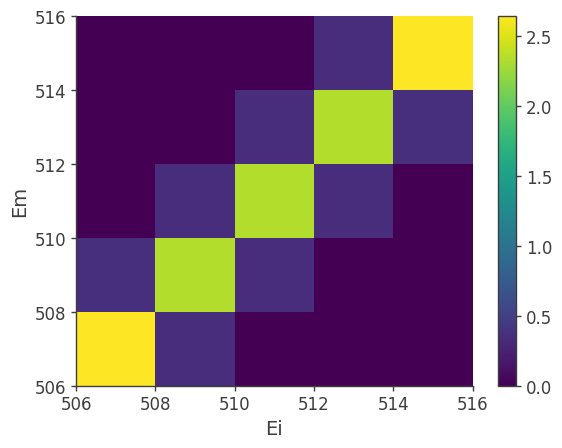

In [4]:
h.project('Ei', 'Em').draw()

In [5]:
eps_col = np.linspace(-0.0075, 0.0075, 6)

In [7]:
for i in range(5):
    Em = (eps_col[i]+eps_col[i+1])/2 * Ei + Ei
    print(Em)
    R[i, :] = gaussian(x=Em, center=Ei)

R /= np.sum(R, axis=0)
R = np.round(R, 2)
R[2, :4] = 0.6
R[2, 4] = 0.61
R[1:4:2, 4] = 0.185

R = R.transpose(1,0)

R[::-1]

[503.958 505.946 507.934 509.922 511.91 ]
[505.479 507.473 509.467 511.461 513.455]
[507. 509. 511. 513. 515.]
[508.521 510.527 512.533 514.539 516.545]
[510.042 512.054 514.066 516.078 518.09 ]


array([[0.01 , 0.185, 0.61 , 0.185, 0.01 ],
       [0.01 , 0.19 , 0.6  , 0.19 , 0.01 ],
       [0.01 , 0.19 , 0.6  , 0.19 , 0.01 ],
       [0.01 , 0.19 , 0.6  , 0.19 , 0.01 ],
       [0.01 , 0.19 , 0.6  , 0.19 , 0.01 ]])

In [8]:
htransformed = Histogram([np.arange(4), np.arange(506, 517, 2)*u.keV, eps_col], contents=np.stack([R, R, R]), unit=u.cm**2, labels=['NuLambda', 'Ei', 'eps'])

In [9]:
htransformed.write('transformed_response_example.h5', overwrite=True)
htransformed.contents

<Quantity [[[0.01 , 0.19 , 0.6  , 0.19 , 0.01 ],
            [0.01 , 0.19 , 0.6  , 0.19 , 0.01 ],
            [0.01 , 0.19 , 0.6  , 0.19 , 0.01 ],
            [0.01 , 0.19 , 0.6  , 0.19 , 0.01 ],
            [0.01 , 0.185, 0.61 , 0.185, 0.01 ]],

           [[0.01 , 0.19 , 0.6  , 0.19 , 0.01 ],
            [0.01 , 0.19 , 0.6  , 0.19 , 0.01 ],
            [0.01 , 0.19 , 0.6  , 0.19 , 0.01 ],
            [0.01 , 0.19 , 0.6  , 0.19 , 0.01 ],
            [0.01 , 0.185, 0.61 , 0.185, 0.01 ]],

           [[0.01 , 0.19 , 0.6  , 0.19 , 0.01 ],
            [0.01 , 0.19 , 0.6  , 0.19 , 0.01 ],
            [0.01 , 0.19 , 0.6  , 0.19 , 0.01 ],
            [0.01 , 0.19 , 0.6  , 0.19 , 0.01 ],
            [0.01 , 0.185, 0.61 , 0.185, 0.01 ]]] cm2>

(<Axes: xlabel='Ei [keV]', ylabel='eps'>,
 <matplotlib.collections.QuadMesh at 0x2b10a7e80>)

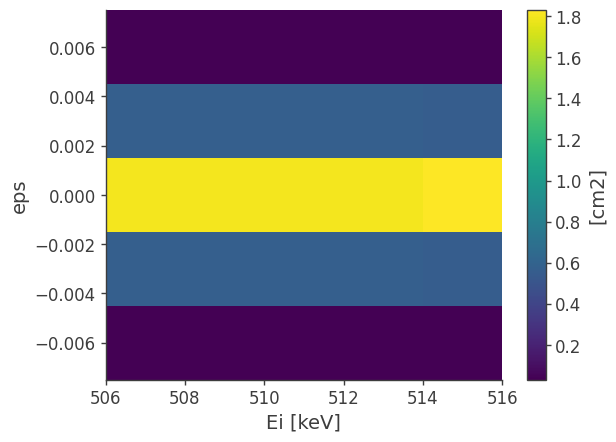

In [11]:
htransformed.project('Ei', 'eps').draw()

### Load example response

In [2]:
image_response = Histogram.open('transformed_response_example.h5')

In [3]:
dr = ListModeResponse(image_response.axes[1:],
                      contents = image_response.slice[1].contents.reshape(5,5),
                      sparse = False,
                      unit = image_response.unit)

In [9]:
Ei0 = 511*u.keV
Em0 = 511*u.keV
dr.get_interp_response({'Ei': Ei0, 'Em': Em0})

Bilinear interpolated value: 0.6 cm2
0.0
0.0
1.0
0.0
Multidimensional interpolated value: 0.6 cm2


<Quantity 0.6 cm2>

In [11]:
Ei0 = 510.4*u.keV
Em0 = 510.3*u.keV
dr.get_interp_response({'Ei': Ei0, 'Em': Em0})

0.19 cm2
0.6 cm2
0.19 cm2
0.6 cm2
0.19 cm2 0.6 cm2 0.19 cm2 0.6 cm2
0.6542842215256062
0.28040752351098924
0.04571577847438243
0.0195924764890221
Multidimensional interpolated value: 0.5732236154650042 cm2
0.0195924764890221 0.04571577847438243 0.28040752351098924 0.6542842215256062


<Quantity 0.57322362 cm2>

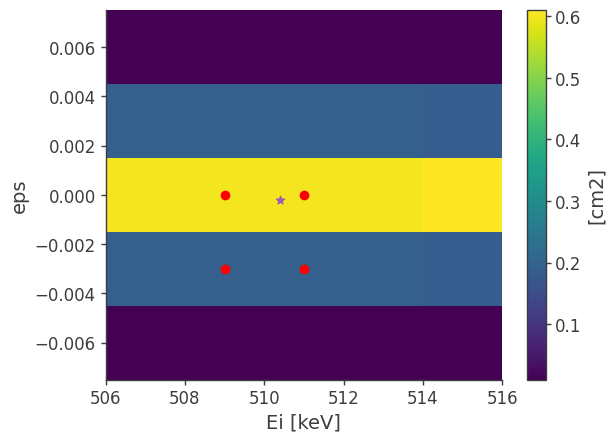

In [12]:
fig, ax = plt.subplots()
dr.draw(ax=ax)
ax.scatter(Ei0, dr.transform_Em_to_eps(Em0, Ei0), marker='*')
for e1 in dr.neighbors[0]:
    for e2 in dr.neighbors[1]:
        ax.scatter(e1, dr.transform_Em_to_eps(e2, Ei0), c='r')
plt.show()

In [118]:
mu = 511

# Create model 0
model0 = np.array([0.005,0.005, 0.98, 0.005, 0.005])
print(model0)

# Create model 1
counts, bins = np.histogram(np.random.normal(loc=mu-1, scale=1, size=10000), bins=np.arange(506, 517, 2))
bincenters = (bins[1:]+bins[:-1])/2 * u.keV
model1 = counts / np.sum(counts)
print(model1)

# Create model 2
counts, bins = np.histogram(np.random.normal(loc=mu, scale=1, size=10000), bins=np.arange(506, 517, 2))
model2 = counts / np.sum(counts)
print(model2)

# Create model 3
counts, bins = np.histogram(np.random.normal(loc=mu+1, scale=1, size=10000), bins=np.arange(506, 517, 2))
model3 = counts / np.sum(counts)
print(model3)

[0.005 0.005 0.98  0.005 0.005]
[0.02530253 0.47234723 0.47974797 0.02260226 0.        ]
[0.0019 0.1481 0.6929 0.1554 0.0017]
[0.     0.0223 0.4764 0.4778 0.0235]


In [200]:
# Simulate events
Ntot = 10
a = np.random.normal(loc=511, scale=1.414, size=Ntot) * u.keV
a

<Quantity [510.28259723, 510.3724874 , 514.74123658, 509.09523829,
           509.89006794, 512.51470685, 508.5429877 , 512.85188286,
           512.16756042, 512.62645645] keV>

In [205]:
loglikes = []
runningsum = 0
loglike = -Ntot
bins = np.arange(506, 517, 2)
n_mu, n_sigma = 30, 30
pred_mu, pred_sigma = np.meshgrid(np.linspace(508, 514, n_mu), np.linspace(0.5, 2.5, n_sigma))
for i in range(n_mu):
    for j in range(n_sigma):
        bincenters = (bins[1:]+bins[:-1])/2
        counts = gaussian(x=bincenters, center=pred_mu[i, j], sigma=pred_sigma[i, j])
        model5 = counts / np.sum(counts)

        for Em in a:
            for model, Ei in zip(model5, bincenters*u.keV):
                rsp_val = dr.get_interp_response({'Ei': Ei, 'Em': Em})
                if rsp_val < 1e-3 * u.cm**2:
                    rsp_val = 1e-3 * u.cm**2
                runningsum += rsp_val * model / u.cm**2

            loglike += np.log(runningsum)
            runningsum = 0
        loglikes.append(loglike)
        loglike = -Ntot

loglike

-10

In [206]:
pred_mu[np.argmax(loglikes)//n_mu, np.argmax(loglikes)%n_mu], pred_sigma[np.argmax(loglikes)//n_sigma, np.argmax(loglikes)%n_sigma]

(511.51724137931035, 1.5344827586206897)

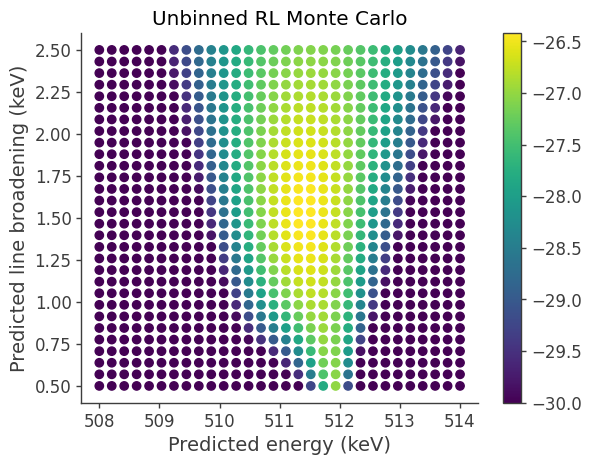

In [210]:
plt.scatter(pred_mu, pred_sigma, c=loglikes, vmin=-30)
plt.xlabel('Predicted energy (keV)')
plt.ylabel('Predicted line broadening (keV)')
plt.title('Unbinned RL Monte Carlo')
plt.colorbar()
plt.show()

In [11]:
with FullDetectorResponse.open('transformed_response_example.h5') as response:
    print(response['DRM'])

KeyError: "Unable to synchronously open attribute (can't locate attribute: 'UNIT')"